In [50]:
import numpy as np
import pandas as pd
import utils
import seaborn as sns
import matplotlib as plt

In [51]:
df_movies = pd.read_csv("./dataset/movies.csv")
df_movies.index = range(1,df_movies.shape[0]+1)
df_movies.head(5)

,movieId,title,genres
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,2,Jumanji (1995),Adventure|Children|Fantasy
3,3,Grumpier Old Men (1995),Comedy|Romance
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,5,Father of the Bride Part II (1995),Comedy


In [52]:
df_ratings = pd.read_csv("./dataset/ratings.csv")
df_ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [53]:
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [54]:
df_movies.genres.value_counts()

genres
Drama                                                  1053
Comedy                                                  946
Comedy|Drama                                            435
Comedy|Romance                                          363
Drama|Romance                                           349
                                                       ... 
Action|Crime|Horror|Mystery|Thriller                      1
Adventure|Animation|Children|Comedy|Musical|Romance       1
Action|Adventure|Animation|Comedy|Crime|Mystery           1
Children|Comedy|Fantasy|Sci-Fi                            1
Action|Animation|Comedy|Fantasy                           1
Name: count, Length: 951, dtype: int64

In [55]:
genre_columns = ["Action", "Adventure", "Animation", "Children", "Comedy", "Crime", "Documentary",
                 "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi",
                 "Thriller", "War", "IMAX", "Western", "(no genres listed)"]
len(genre_columns)

20

In [56]:
genre_columns = set('|'.join(df_movies["genres"]).split('|'))
genre_columns = list(genre_columns)
genre_columns.sort()
genre_columns

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [57]:
Y, R = utils.prepare_y_r(df_movies, df_ratings)
# Y.max(axis=1).loc[Y.max(axis=1) == 0]
# Y[Y != 0].mean(axis=1)
Y.head(3)

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,4.5,3.5,4.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,3.0,4.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,4.0,0.0,2.5,0.0,0.0,5.0,0.0,4.5,0.0,0.0,0.5,0.0,4.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,4.0,0.0,0.0,3.0,3.0,4.0,0.0,3.0,0.0,0.0,5.0,0.0,4.5,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,3.0,4.0,0.0,4.0,0.0,0.0,3.0,4.0,0.0,0.0,3.5,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,0.0,3.0,4.0,0.0,0.0,4.5,4.0,4.0,0.0,0.0,0.0,0.0,5.0,3.5,0.0,4.5,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,5.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,3.0,0.0,3.0,4.0,0.0,3.5,5.0,0.0,0.0,3.5,0.0,0.0,3.5,0.0,0.0,5.0,0.0,0.0,3.5,3.0,5.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,0.0,4.5,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0

In [58]:
"""
since zero means not rated and the minimum ratings is 0.5
to calculate the mean of ratings for each movie
we need to ignore the zeros then calculate the mean
for the test the expected output is
0 | 3.0
1 | 2.0
"""
test_df = pd.DataFrame(np.array([[0,0,3],[1,2,3]]))
print(f"the mean w/ dropping the zeros\n{test_df[test_df != 0].mean(axis=1)}")
print(f"the mean w/o dropping the zeros\n{test_df.mean(axis=1)}")

the mean w/ dropping the zeros
0    3.0
1    2.0
dtype: float64
the mean w/o dropping the zeros
0    1.0
1    2.0
dtype: float64


In [59]:
mean_rating = Y[R != 0].mean(axis=1).to_frame()
mean_rating.reset_index(inplace=True)
mean_rating = mean_rating.rename(columns = {'index':'movieId', 0 : 'mean_rating'})
mean_rating.index = range(1,df_movies.shape[0]+1)
df_movies["mean_rating"] = mean_rating.mean_rating
df_movies.tail(3)

,movieId,title,genres,mean_rating
9740,193585,Flint (2017),Drama,3.5
9741,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.5
9742,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,4.0


In [60]:
X = utils.prepare_x(df_movies, genre_columns)
X.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
df_movies.describe()

,movieId,mean_rating
count,9742.000000,9724.000000
mean,42200.353623,3.262448
std,52160.494854,0.869874
min,1.000000,0.500000
25%,3248.250000,2.800000
50%,7300.000000,3.416667
75%,76232.000000,3.911765
max,193609.000000,5.000000


<Axes: xlabel='mean_rating', ylabel='Percent'>

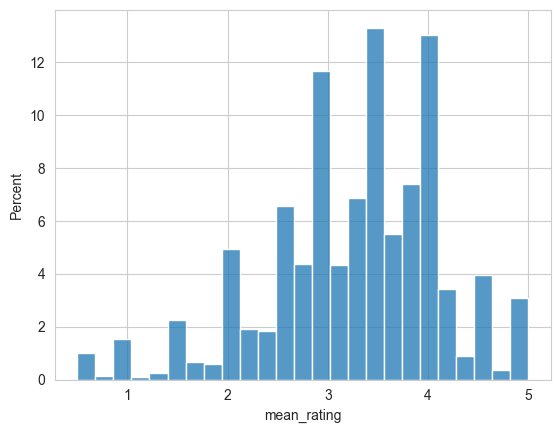

In [62]:
sns.histplot(df_movies["mean_rating"], bins=25, stat='percent')

Text(0.5, 1.0, 'boxplot of the mean rating of movies')

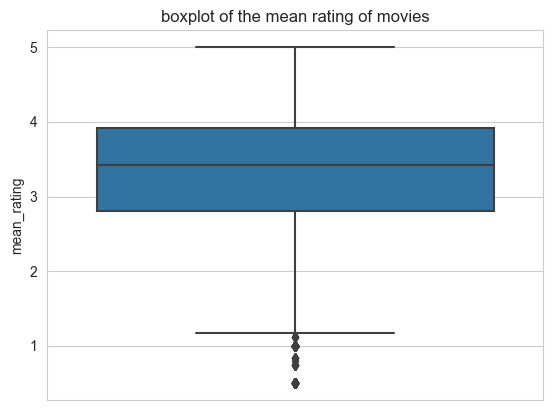

In [63]:
sns.boxplot(data=df_movies, y="mean_rating").set_title("boxplot of the mean rating of movies")

In [69]:
# .loc[df_movies["mean_rating"] == df_movies.mean_rating.max(), :]
da = df_movies.copy()
rates_count = Y[Y != 0].count(axis=1).to_frame()
rates_count.reset_index(inplace=True)
rates_count = rates_count.rename(columns={'index' : 'movieId', 0 : 'nbr_rates'})
rates_count.index = range(1, rates_count.shape[0] + 1)
da["nbr_rates"] = rates_count.nbr_rates
da

,movieId,title,genres,mean_rating,nbr_rates
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215
2,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110
3,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7
5,5,Father of the Bride Part II (1995),Comedy,3.071429,49
...,...,...,...,...,...
9738,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1
9739,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1
9740,193585,Flint (2017),Drama,3.500000,1
9741,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1
